In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *

In [2]:
# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

In [3]:
train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

In [4]:
# 1. 실험용 설정==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

In [5]:
networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    

In [7]:
# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))

===========iteration:0===========
SGD:0.2589909139898105
Momentum:0.09162745585763862
AdaGrad:0.043090743169323056
Adam:0.07333760019341248
===========iteration:100===========
SGD:0.1801377304847127
Momentum:0.11702067651566694
AdaGrad:0.05224141940857531
Adam:0.07120913626070537
===========iteration:200===========
SGD:0.17080785056599881
Momentum:0.07042123244283863
AdaGrad:0.018513413219652507
Adam:0.033041327555465835
===========iteration:300===========
SGD:0.21607541388177903
Momentum:0.12185722816453583
AdaGrad:0.05642530755303601
Adam:0.0592017677217105
===========iteration:400===========
SGD:0.18646312598024872
Momentum:0.041619227672396134
AdaGrad:0.015938409740083925
Adam:0.007785156572450406
===========iteration:500===========
SGD:0.22681084400354645
Momentum:0.04858182802008635
AdaGrad:0.029575239487107476
Adam:0.03977017547685165
===========iteration:600===========
SGD:0.3154929369991327
Momentum:0.09675910956336843
AdaGrad:0.10632091941113699
Adam:0.05719345802137967
=====

ValueError: x and y must have same first dimension, but have shapes (2000,) and (3156,)

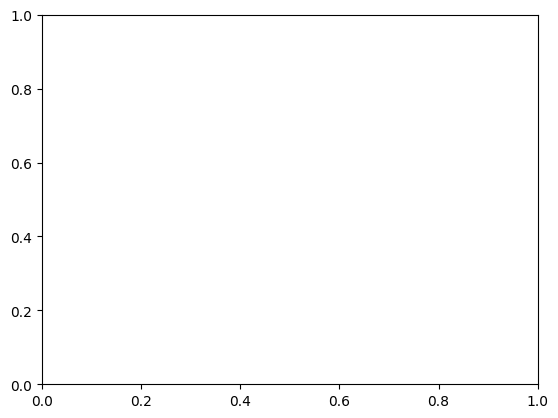

In [8]:
# 3. 그래프 그리기==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()